In [ ]:
#Who was being polled and what was their party affiliation
#Did the poll results favor a specific candidate?
#How do undecided voters affect the poll?
#Can we account for the undecided voters?
#How did voter sentiment change over time?
#Can we see an effect in the polls from the database?

In [5]:
#data
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Used to grab data from web
import requests 

#to work with csv files, need .read() method
from io import StringIO

In [3]:
#for python 2 users, but I'm using 3.7
from __future__ import division

In [6]:
#Data for the polls will be pulled from HuffPost Pollster.
url = "https://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

#Use request to get the information from URL in text form
source = requests.get(url).text

poll_data = StringIO(source)

In [7]:
poll_df = pd.read_csv(poll_data)

In [8]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                1522 non-null   object 
 1   Start Date              1522 non-null   object 
 2   End Date                1522 non-null   object 
 3   Entry Date/Time (ET)    1522 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Population              1522 non-null   object 
 6   Mode                    1522 non-null   object 
 7   Trump                   1522 non-null   float64
 8   Clinton                 1522 non-null   float64
 9   Other                   1098 non-null   float64
 10  Undecided               1460 non-null   float64
 11  Pollster URL            1522 non-null   object 
 12  Source URL              1522 non-null   object 
 13  Partisan                1522 non-null   object 
 14  Affiliation             1522 non-null   

In [9]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


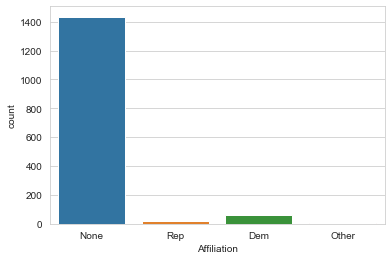

In [10]:
#Not much political affiliation, but minor traces of Dem affil.

sns.countplot('Affiliation',data=poll_df)

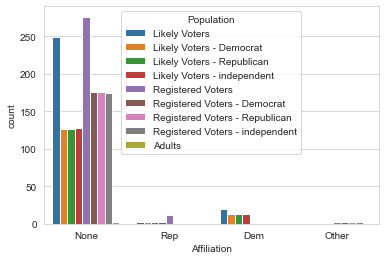

In [12]:
sns.countplot('Affiliation',data=poll_df,hue='Population')

In [31]:
#Taking a look at averages of Clinton, Trump, and other.

#First to get an average
#Make an object named Average by taking the mean of the df
#Drop the number of obs column. 
avg = pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations', axis=0, inplace=True)
avg.drop('Question Iteration',axis=0, inplace=True)

In [32]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)
std.drop('Question Iteration',axis=0, inplace=True)

In [33]:
std.head()

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118


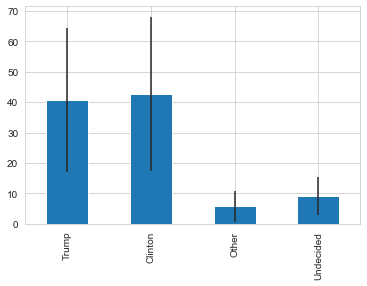

In [34]:
#That's a hell of a standard deviation. 
avg.plot(yerr=std,kind='bar',legend=False)

In [39]:
poll_avg = pd.concat([avg,std],axis=1)

In [42]:
poll_avg.columns = ['Average','STD']
poll_avg

,Average,STD
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


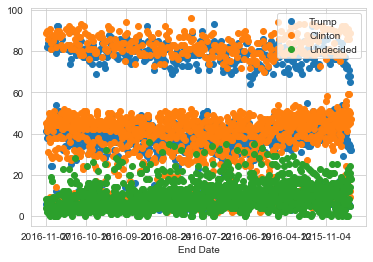

In [43]:
#Plotting voter sentiment
#X-Axis is backwards. Election happens on the left side, as UnDec decrease.

poll_df.plot(x='End Date',y=['Trump','Clinton','Undecided'], linestyle='',marker='o')

In [44]:
from datetime import datetime

In [46]:
#Positive difference indicates leaning to Clinton
#Negative difference indicates leaning to Trump

poll_df['Difference'] = (poll_df.Clinton - poll_df.Trump)/100

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,-0.02


In [47]:
#Take poll data frame, groupby start dates, index fale to keep 01234 index
#mean the averages of the start date.
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,0.1425


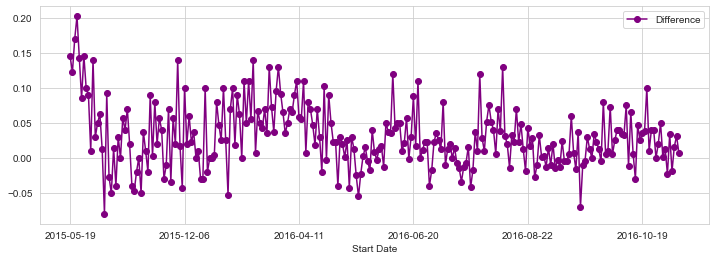

In [49]:
#Positive = Clinton
#Negative = Trump

poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',
            color='purple')

In [51]:
#Let's plot debates and see if they had an effect.
row_in = 0
xlimit = []

#Set X-Limits to set October period
#create for loop
#If the date started in 2016-10 (october)
#Append the xlimit with the row-index
#add one to the row index to keep the count going

for date in poll_df['Start Date']:
    if date[0:7] == '2016-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
print (min(xlimit))
print (max(xlimit))

232
262


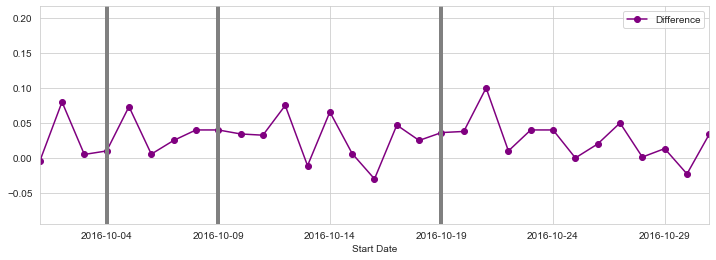

In [53]:
#Now to use the data/function we just created, setting XLimits

poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',
            color='purple', xlim=(232,262))

#Marking debates
#232 is the 1st of October

#Oct. 4, 2016
plt.axvline(x=232+3,linewidth=4,color='grey')
#Oct. 9, 2016
plt.axvline(x=232+8,linewidth=4,color='grey')
#Oct. 19, 2016
plt.axvline(x=232+18,linewidth=4,color='grey')

#Clinton did momentarily better (if at all) after debates
#but the victories were short lived.